Original dataset from Kaggle's [Students Performance in Exams](https://www.kaggle.com/spscientist/students-performance-in-exams).

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from scipy.stats import boxcox


In [2]:
df = pd.read_csv('studentsperformance.csv')

### 1) Are the exam score variables normally distributed? If not, apply a Box-Cox transformation. Does anything change?
A visual inspection of the distributions for each subject matter shows that there is a slight left skew, so already we know the scores are not normally distributed.  Statistical tests such as Jarque-Bera and normality tests can confirm.  

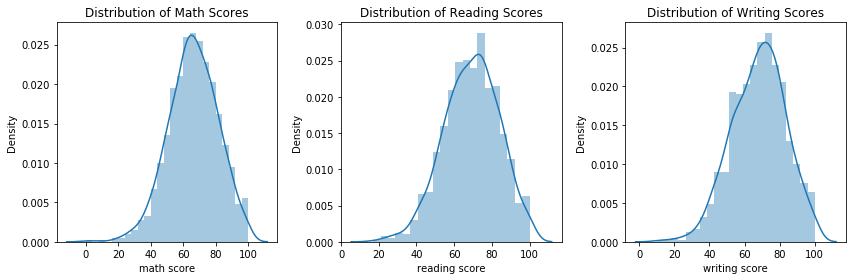

In [3]:
fig, (axis1, axis2, axis3) = plt.subplots(1,3,figsize=(12,4))

sns.distplot(df['math score'], ax = axis1)
sns.distplot(df['reading score'], ax = axis2)
sns.distplot(df['writing score'], ax = axis3)

axis1.set_title('Distribution of Math Scores')
axis2.set_title('Distribution of Reading Scores')
axis3.set_title('Distribution of Writing Scores')

for ax in [axis1, axis2, axis3]:
    ax.set_ylabel('Density')
    
plt.tight_layout()

With the Jarque-Bera test, the null hypothesis is that skew and excess kurtosis are zero.  If I set the significance value at 0.05, then all of the scores for the Jarque-Bera test reject the null hypothesis, indicating the scores are statistically different from a normal distribution.  

The normal test's null hypothesis says that all values in a sample have a Gaussian distribution.  Again, if the significance level is set at 0.05, then with such low p-values, the null hypothesis is rejected and the distribution of the data is not Gaussian.  

In [4]:
print('For math, Jarque-Bera statistics: {} and p-value of {}'.format(jarque_bera(df['math score'])[0], jarque_bera(df['math score'])[1]))
print('For math, normal test statistics: {} and p-value of {}'.format(normaltest(df['math score'])[0], normaltest(df['math score'])[1]))

For math, Jarque-Bera statistics: 15.912256686712709 and p-value of 0.0003505075386818213
For math, normal test statistics: 15.408960513931822 and p-value of 0.00045080293869937836


In [5]:
print('For reading, Jarque-Bera statistics: {} and p-value of {}'.format(jarque_bera(df['reading score'])[0], jarque_bera(df['reading score'])[1]))
print('For reading, normal test statistics: {} and p-value of {}'.format(normaltest(df['reading score'])[0], normaltest(df['reading score'])[1]))

For reading, Jarque-Bera statistics: 11.383300575987892 and p-value of 0.0033740202672214448
For reading, normal test statistics: 11.11741279628622 and p-value of 0.003853758403576582


In [6]:
print('For writing, Jarque-Bera statistics: {} and p-value of {}'.format(jarque_bera(df['writing score'])[0], jarque_bera(df['writing score'])[1]))
print('For writing, normal test statistics: {} and p-value of {}'.format(normaltest(df['writing score'])[0], normaltest(df['writing score'])[1]))

For writing, Jarque-Bera statistics: 13.98509448257235 and p-value of 0.0009187033894586527
For writing, normal test statistics: 13.606450837263859 and p-value of 0.0011101885439899974


#### 1.1 - Applying Box-Cox Transformation
Box-Cox transformations can be used to transform data into a normal distribution.  However, it can only be used on data that is greater than zero.  Any scores of 0 were dropped from the math scores.  A plot of the Box-Cot transformed data shows that it looks more normally distributed than the raw data.

In [7]:
math_boxcot, _ = boxcox(df[df['math score'] > 0]['math score'])
reading_boxcot, _ = boxcox(df['reading score'])
writing_boxcot, _ = boxcox(df['writing score'])

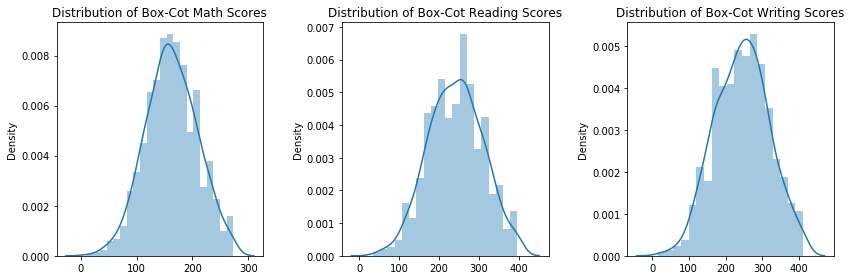

In [8]:
fig, (axis1, axis2, axis3) = plt.subplots(1,3,figsize=(12,4))

sns.distplot(math_boxcot, ax = axis1)
sns.distplot(reading_boxcot, ax = axis2)
sns.distplot(writing_boxcot, ax = axis3)

axis1.set_title('Distribution of Box-Cot Math Scores')
axis2.set_title('Distribution of Box-Cot Reading Scores')
axis3.set_title('Distribution of Box-Cot Writing Scores')

for ax in [axis1, axis2, axis3]:
    ax.set_ylabel('Density')
    
plt.tight_layout()

Repeating the exercise with Jarque-Bera and normality tests with a 5% significance level, it seems that for the most part the Box-Cot transformation worked to create normally distributed data.  The only one that it didn't work for was the writing score.

In [9]:
print('For Box-Cot transformed math, Jarque-Bera statistics: {} and p-value of {}'.format(jarque_bera(math_boxcot)[0], jarque_bera(math_boxcot)[1]))
print('For Box-Cot transformed math, normal test statistics: {} and p-value of {}'.format(normaltest(math_boxcot)[0], normaltest(math_boxcot)[1]))

For Box-Cot transformed math, Jarque-Bera statistics: 1.720098104874378 and p-value of 0.4231413256953709
For Box-Cot transformed math, normal test statistics: 1.8323073377495822 and p-value of 0.40005482895717037


In [10]:
print('For Box-Cot transformed reading, Jarque-Bera statistics: {} and p-value of {}'.format(jarque_bera(reading_boxcot)[0], jarque_bera(reading_boxcot)[1]))
print('For Box-Cot transformed reading, normal test statistics: {} and p-value of {}'.format(normaltest(reading_boxcot)[0], normaltest(reading_boxcot)[1]))

For Box-Cot transformed reading, Jarque-Bera statistics: 4.119778575331906 and p-value of 0.1274680814024559
For Box-Cot transformed reading, normal test statistics: 5.282274611852865 and p-value of 0.07128015609575467


In [11]:
print('For Box-Cot transformed writing, Jarque-Bera statistics: {} and p-value of {}'.format(jarque_bera(writing_boxcot)[0], jarque_bera(writing_boxcot)[1]))
print('For Box-Cot transformed writing, normal test statistics: {} and p-value of {}'.format(normaltest(writing_boxcot)[0], normaltest(writing_boxcot)[1]))

For Box-Cot transformed writing, Jarque-Bera statistics: 4.746478090040098 and p-value of 0.09317842784055597
For Box-Cot transformed writing, normal test statistics: 6.267311355043339 and p-value of 0.04355827085023795


### 2) Say we want to use a single variable for the exam scores as our target. For this purpose, create a new variable by taking an average of the exam scores. Check whether this new variable is normally distributed. If it's not normally distributed, apply a Box-Cox transformation and check whether or not the transformed variable is normally distributed.

The distribution of average scores looks more normally distributed than the raw scores alone, but there is still a little right skew.  The Jarque-Bera and normality tests have p-values below 0.05, so the null hypothesis is rejected; they are not normally distributed.

In [12]:
df['score average'] = (df['math score'] + df['reading score'] + df['writing score'])/3

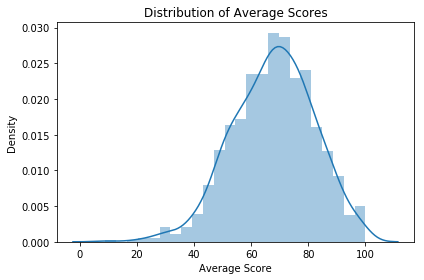

In [13]:
sns.distplot(df['score average'])
plt.title('Distribution of Average Scores')
plt.xlabel('Average Score')
plt.ylabel('Density')
plt.tight_layout()

In [14]:
print('For average scores, Jarque-Bera statistics: {} and p-value of {}'.format(jarque_bera(df['score average'])[0], jarque_bera(df['score average'])[1]))
print('For average scores, normal test statistics: {} and p-value of {}'.format(normaltest(df['score average'])[0], normaltest(df['score average'])[1]))

For average scores, Jarque-Bera statistics: 15.453387913085168 and p-value of 0.00044089934264401887
For average scores, normal test statistics: 15.186721327231322 and p-value of 0.0005037851534494478


#### 2.1 - Box-Cot Transformation

Visually, the Box-Cot transformation on the average score looks more normally distributed.  The Jarque-Bera and normaly tests have a p value over 0.05, showing the data is normally distributed.

In [15]:
df['boxcot score average'] = boxcox(df['score average'])[0]

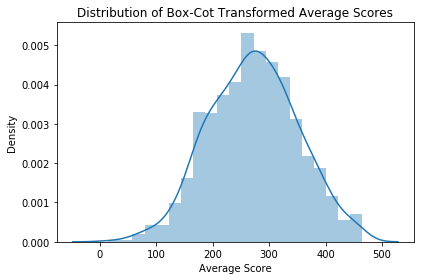

In [16]:
sns.distplot(df['boxcot score average'])
plt.title('Distribution of Box-Cot Transformed Average Scores')
plt.xlabel('Average Score')
plt.ylabel('Density')
plt.tight_layout()

In [17]:
print('For Box-Cot average scores, Jarque-Bera statistics: {} and p-value of {}'.format(jarque_bera(df['boxcot score average'])[0], jarque_bera(df['boxcot score average'])[1]))
print('For Box-Cot average scores, normal test statistics: {} and p-value of {}'.format(normaltest(df['boxcot score average'])[0], normaltest(df['boxcot score average'])[1]))

For Box-Cot average scores, Jarque-Bera statistics: 2.4353987431906026 and p-value of 0.29591016374203183
For Box-Cot average scores, normal test statistics: 2.779857245981238 and p-value of 0.2490930835165177


### 3) Which variables seem related to the target variable (the newly created variable in the previous question)? If our goal is to explain the determinants of success in exams, which variables in our dataset might be useful?

In terms of average scores, there are 5 variables to look at: gender, race, parent's education level, type of lunch received, and test preparation course completeness.  Visually, it seems that each one has an effect on the score.  Briefly, it seems that 1) females score higher than males, 2) group A scores the lowest and each subsequent group scores higher, 3) students whose parents had at least some college scored higher than students who's parents got up to a high school education, 4) students who received a standard lunch scored higher than those who didn't, and 5) those who completed the test preparation course scored higher than those who didn't.  

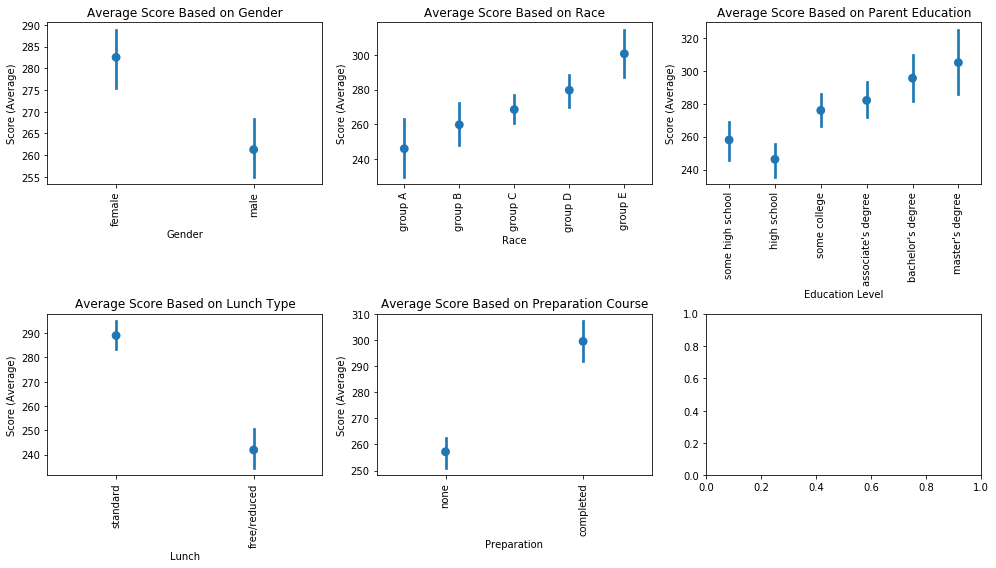

In [39]:
fig, ((axis1, axis2, axis3), (axis4, axis5, axis6)) = plt.subplots(2,3,figsize=(14,8))

race_order = ['group A', 'group B', 'group C', 'group D', 'group E']
edu_order = ['some high school', 'high school', 'some college', 'associate\'s degree', 'bachelor\'s degree', 'master\'s degree']

sns.pointplot(x = 'gender', y = 'boxcot score average', data = df, linestyles='', ax = axis1)
sns.pointplot(x = 'race/ethnicity', y = 'boxcot score average', order = race_order, data = df, linestyles='', ax = axis2)
sns.pointplot(x = 'parental level of education', y = 'boxcot score average', order = edu_order, data = df, linestyles='', ax = axis3)
sns.pointplot(x = 'lunch', y = 'boxcot score average', data = df, linestyles='', ax = axis4)
sns.pointplot(x = 'test preparation course', y = 'boxcot score average', data = df, linestyles='', ax = axis5)

axis1.set_title('Average Score Based on Gender')
axis1.set_xlabel('Gender')
axis2.set_title('Average Score Based on Race')
axis2.set_xlabel('Race')
axis3.set_title('Average Score Based on Parent Education')
axis3.set_xlabel('Education Level')
axis4.set_title('Average Score Based on Lunch Type')
axis4.set_xlabel('Lunch')
axis5.set_title('Average Score Based on Preparation Course')
axis5.set_xlabel('Preparation')

for ax in [axis1, axis2, axis3, axis4, axis5]:
    ax.set_ylabel('Score (Average)')
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
        
plt.tight_layout()